# 6.2. Fine-Tuning CNN Multiclass Classification - Fashion MNIST Dataset
* "시작하세요! 텐서플로우 2.0 프로그래밍",
  * 6.4. 퍼포먼스 높이기, pp.161-172
    * 6.4.1. 더 많은 레이어 쌓기 pp.162-166
    * 6.4.2. 이미지 보강 (Data Augmentation) pp.166-172
  
* Fashion MNIST 데이터세트를 CNN으로 훈련하는 문제입니다. 
* 단순한 구조지만 괜찮은 성능을 보이는 CNN 구조인 VGGNet 스타일 모델의 85% 정확도를 높이는 것이 목적입니다.
  * VGGNet은 여러 구조로 실험이 진행됐고, 웨이트 있는 레이어가 19개 있는 VGG-19가 가장 깊은 구조입니다.
  * (Conv2D x2 + MaxPool2D)x2 + (Conv2D x4 + MaxPool2D )x3 + Dense x3= 2x2 + 4x3 + 3 = 4+12+3=19
  * (Conv2D x2 + MaxPool2D)x2 + (Conv2D x4 + MaxPool2D )x3 = 3x2 + 5x3 = 6+15=21 이므로 안 맞음
* 더 많은 레이어 쌓기와 이미지 보강 (Image Augmentation) 기법을 이용합니다.

In [1]:
def show_an_image( numpy_ndarray, cmap=None ):
  # Fashion MNIST Dataset
  import matplotlib.pyplot as plt

  plt.imshow( numpy_ndarray, cmap )
  plt.colorbar()
  plt.show()
  
def plot_learning_curve( history ):

    import matplotlib.pyplot as plt
    plt.figure( figsize=(12,4) )

    plt.subplot( 1,2,1 )
    plt.plot( history.history['loss'], 'b-', label='loss' )
    plt.plot( history.history['val_loss'], 'r--', label='val_loss' )
    plt.xlabel( 'Epoch' )
    plt.legend()

    plt.subplot( 1, 2, 2 )
    plt.plot( history.history['accuracy'], 'g-', label='accuracy' )
    plt.plot( history.history['val_accuracy'], 'k--', label='val_accuracy' )
    plt.xlabel( 'Epoch' )
    plt.ylim( 0.7, 1 )
    plt.legend()

    plt.show()

In [2]:
def get_dataset():
  import tensorflow as tf

  fashion_mnist_module = tf.keras.datasets.fashion_mnist
  (train_x, train_y), (test_x, test_y) = fashion_mnist_module.load_data()

  # Normalize data
  train_x = train_x / 255.0
  test_x = test_x / 255.0

  train_x = train_x.reshape(-1, 28, 28, 1)
  test_x = test_x.reshape(-1, 28, 28, 1)

  return (train_x, train_y), (test_x, test_y)

In [3]:
(train_x, train_y), (test_x, test_y) = get_dataset()

### 6.4.1. 더 많은 레이어 쌓기

In [4]:
import tensorflow as tf

# VGG-like architecture: it's like VGG-7

model = tf.keras.Sequential([
  # Feature extractor
  tf.keras.layers.Conv2D( input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu' ),
  tf.keras.layers.Conv2D( kernel_size=(3,3), filters=64, padding='same', activation='relu' ),
  tf.keras.layers.MaxPool2D( pool_size=(2,2) ), 
  tf.keras.layers.Dropout( rate=0.5 ),
  tf.keras.layers.Conv2D( kernel_size=(3,3), filters=128, padding='same', activation='relu' ),
  tf.keras.layers.Conv2D( kernel_size=(3,3), filters=256, padding='valid', activation='relu' ), # valid, not same!
  tf.keras.layers.MaxPool2D( pool_size=(2,2) ),
  tf.keras.layers.Dropout( rate=0.5 ),
  # Classifier
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense( units=512, activation='relu'),
  tf.keras.layers.Dropout( rate=0.5 ),
  tf.keras.layers.Dense( units=256, activation='relu'),
  tf.keras.layers.Dropout( rate=0.5 ),
  tf.keras.layers.Dense( units=10, activation='softmax')
])

model.compile( optimizer=tf.keras.optimizers.Adam(),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'] )

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)         0

In [5]:
history = model.fit( train_x, train_y, epochs=25, validation_split=0.25 )

Train on 45000 samples, validate on 15000 samples
Epoch 1/25
45000/45000 [==============================] - 523s 12ms/sample - loss: 0.5661 - accuracy: 0.7952 - val_loss: 0.3384 - val_accuracy: 0.8711
Epoch 2/25
45000/45000 [==============================] - 464s 10ms/sample - loss: 0.3661 - accuracy: 0.8675 - val_loss: 0.2854 - val_accuracy: 0.8925
Epoch 3/25
45000/45000 [==============================] - 568s 13ms/sample - loss: 0.3204 - accuracy: 0.8850 - val_loss: 0.2514 - val_accuracy: 0.9093
Epoch 4/25
45000/45000 [==============================] - 584s 13ms/sample - loss: 0.2978 - accuracy: 0.8943 - val_loss: 0.2460 - val_accuracy: 0.9099
Epoch 5/25
45000/45000 [==============================] - 490s 11ms/sample - loss: 0.2794 - accuracy: 0.8997 - val_loss: 0.2332 - val_accuracy: 0.9168
Epoch 6/25
45000/45000 [==============================] - 450s 10ms/sample - loss: 0.2727 - accuracy: 0.9018 - val_loss: 0.2262 - val_accuracy: 0.9171
Epoch 7/25
45000/45000 [====================

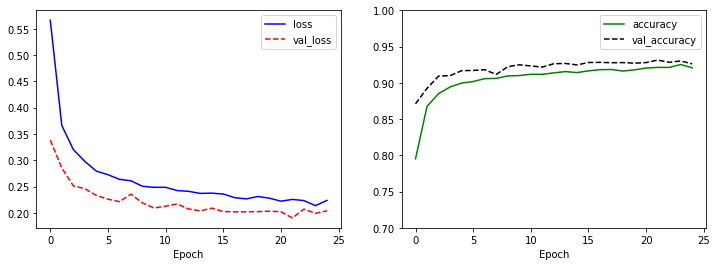

In [6]:
plot_learning_curve( history )

In [7]:
model.evaluate( test_x, test_y, verbose=0 )

[0.22023849499225617, 0.9204]

* 이제는 validation loss가 loss와 같이 떨어지는 정상적인 결과를 얻을 수 있습니다.
* Accuracy와 Validation Accuracy도 유사하게 높아집니다.
* 테스트 성능은 91.69%로 추가로 높아졌습니다.

### 6.4.2. 이미지 보강 (Data Augmentation)
* tf.keras에 이미지 보강을 위한 ImageDataGenerator가 있습니다. 
* 훈련데이터의 첫 번째 이미지를 변형시켜 봅니다.
  * rotation 회전
  * zoom 확대
  * shear 기울임
  * shift 이동
    * width shift 평행 이동
    * height shift 수직 이동
  * flip 뒤집기
    * horizontal flip 좌우 뒤집기
    * vertical flip 위아래 뒤집기

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

image_generator = ImageDataGenerator(
  rotation_range=10,
  zoom_range=0.10,
  shear_range=0.5,
  width_shift_range=0.10,
  height_shift_range=0.10,
  horizontal_flip=True,
  vertical_flip=False )

augment_size = 100
repetition = 100
# input_image = 

x_augmented = image_generator.flow( 
    np.tile( train_x[0].reshape(28*28), repetition ).reshape( -1,28,28,1),
    np.zeros( augment_size ),
    batch_size=augment_size,
    shuffle=False ).next()[0]

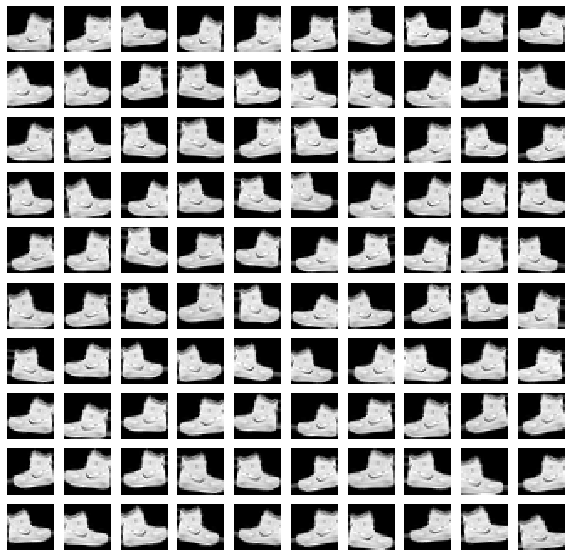

In [9]:
# Show the generated image
import matplotlib.pyplot as plt
plt.figure( figsize=(10,10) )
for c in range(100):
    plt.subplot( 10, 10, c+1 )
    plt.axis( 'off' )
    plt.imshow( x_augmented[c].reshape( 28,28 ), cmap='gray' )
plt.show()

위의 그림을 보면 이미지가 조금씩 변경된 것을 알 수 있습니다.

아래는 6만개의 훈련데이터의 50%에 해당하는 3만개의 이미지를 추가합니다.

In [10]:
# 다량의 이미지를 생성
image_generator = ImageDataGenerator(
  rotation_range=10,
  zoom_range=0.10,
  shear_range=0.5,
  width_shift_range=0.10,
  height_shift_range=0.10,
  horizontal_flip=True,
  vertical_flip=False )
  
augment_size = 30000

randidx = np.random.randint( train_x.shape[0], size=augment_size )
randidx, randidx.shape

(array([53496,  2765, 47535, ..., 37672, 36285, 59479]), (30000,))

In [11]:
x_augmented = train_x[ randidx ].copy()
y_augmented = train_y[ randidx ].copy()

x_augmented = image_generator.flow( x_augmented, np.zeros( augment_size ),
                                    batch_size=augment_size, shuffle=False).next()[0]

In [12]:
train_x = np.concatenate( (train_x, x_augmented) )
train_y = np.concatenate( (train_y, y_augmented) )

In [13]:
train_x.shape

(90000, 28, 28, 1)

전체 데이터 수가 9만개로 늘어났습니다.

아래 네트워크는 동일한 것을 씁니다.

In [14]:
model = tf.keras.Sequential([
  # Feature extractor
  tf.keras.layers.Conv2D( input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu' ),
  tf.keras.layers.Conv2D( kernel_size=(3,3), filters=64, padding='same', activation='relu' ),
  tf.keras.layers.MaxPool2D( pool_size=(2,2) ), 
  tf.keras.layers.Dropout( rate=0.5 ),
  tf.keras.layers.Conv2D( kernel_size=(3,3), filters=128, padding='same', activation='relu' ),
  tf.keras.layers.Conv2D( kernel_size=(3,3), filters=256, padding='valid', activation='relu' ), # valid, not same!
  tf.keras.layers.MaxPool2D( pool_size=(2,2) ),
  tf.keras.layers.Dropout( rate=0.5 ),
  # Classifier
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense( units=512, activation='relu'),
  tf.keras.layers.Dropout( rate=0.5 ),
  tf.keras.layers.Dense( units=256, activation='relu'),
  tf.keras.layers.Dropout( rate=0.5 ),
  tf.keras.layers.Dense( units=10, activation='softmax')
])

model.compile( optimizer=tf.keras.optimizers.Adam(),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'] )
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 256)        

In [ ]:
history = model.fit( train_x, train_y, epochs=25, validation_split=0.25 )

Train on 67500 samples, validate on 22500 samples
Epoch 1/25
67500/67500 [==============================] - 251s 4ms/sample - loss: 0.5759 - accuracy: 0.7896 - val_loss: 0.5878 - val_accuracy: 0.7752
Epoch 2/25
67500/67500 [==============================] - 249s 4ms/sample - loss: 0.3809 - accuracy: 0.8629 - val_loss: 0.5093 - val_accuracy: 0.8105
Epoch 3/25
67500/67500 [==============================] - 253s 4ms/sample - loss: 0.3454 - accuracy: 0.8749 - val_loss: 0.4476 - val_accuracy: 0.8278
Epoch 4/25
67500/67500 [==============================] - 251s 4ms/sample - loss: 0.3174 - accuracy: 0.8860 - val_loss: 0.4352 - val_accuracy: 0.8391
Epoch 5/25
67500/67500 [==============================] - 253s 4ms/sample - loss: 0.3106 - accuracy: 0.8880 - val_loss: 0.4303 - val_accuracy: 0.8409
Epoch 6/25
67500/67500 [==============================] - 249s 4ms/sample - loss: 0.2966 - accuracy: 0.8933 - val_loss: 0.4074 - val_accuracy: 0.8489
Epoch 7/25
67500/67500 [==========================

In [ ]:
plot_learning_curve( history )

In [ ]:
model.evaluate( test_x, test_y, verbose=0 )

테스트 결과는 92.로 약간 높아졌습니다. 